# Boston Housing Data: Multiple Linear Regression

# Initial Imports

In [82]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics

# Reading in Data

In [83]:
# Reading in CSV
housing_path = Path("../Project-1/Boston Housing Example/boston.csv")
housing_data = pd.read_csv(housing_path)
housing_data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Variable Description
##### ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
##### INDUS: proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### NOX: nitric oxides concentration (parts per 10 million)
##### RM: average number of rooms per dwelling
##### AGE: proportion of owner-occupied units built prior to 1940
##### DIS: weighted distances to ﬁve Boston employment centers
##### RAD: index of accessibility to radial highways
##### TAX: full-value property-tax rate per 10000 dollars
##### PTRATIO: pupil-teacher ratio by town 12
##### B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13
##### LSTAT: % lower status of the population
##### MEDV: Median value of owner-occupied homes in 1000s dollars

# Data Processing

In [84]:
# Column Manupulation

# Changing types
housing_data["CHAS"] = housing_data["CHAS"].astype("int")
housing_data["RAD"] = housing_data["RAD"].astype("int")

# Renaming the target column
housing_data = housing_data.rename(columns={
    "target": "MEDV"
})

# Removing useless columns
housing_data = housing_data.drop(columns=["Unnamed: 0"])

# Nulls
housing_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [85]:
# Gathering knowledge about the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [86]:
# Data Description
print(housing_data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Correlation Analysis

In [87]:
correlations = housing_data.corr(method='pearson')
correlations

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


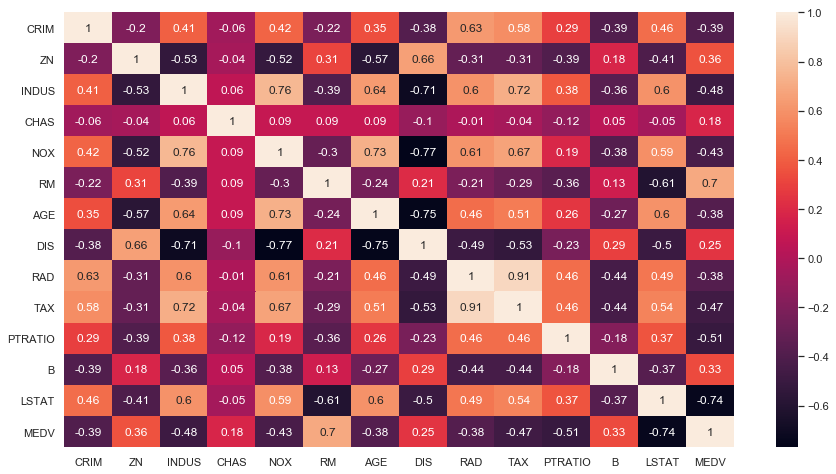

In [88]:
# Correlation Matrix
correlation_matrix = housing_data.corr().round(2)
plt.figure(figsize=(15,8))
ax = sns.heatmap(data=correlation_matrix, annot=True)

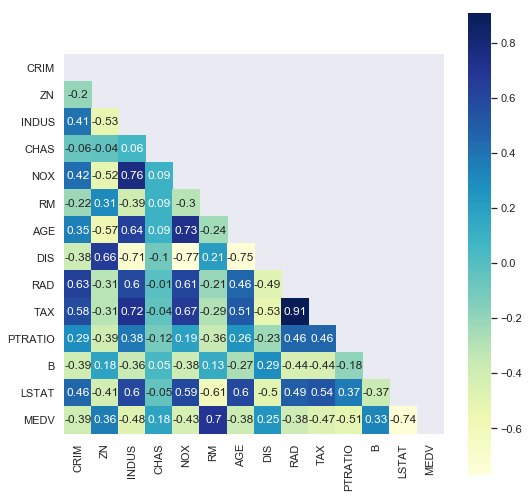

In [89]:
# Steps to remove redundant values
mask = np.zeros_like(housing_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(housing_data.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);

### Observations:
##### 1. Target variable MEDV is strongly correlated with LSTAT and RM
##### 2. RAD and TAX , NOX and INDUS and, DIS and NOX are highly correlated with each other
##### Therefore we dont include these

In [90]:
# Removing correlated columns
housing_data = housing_data.drop(columns= ["NOX", "INDUS", "RAD", "TAX", "DIS"])
housing_data.head()

,CRIM,ZN,CHAS,RM,AGE,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,0,6.575,65.2,15.3,396.90,4.98,24.0
1,0.02731,0.0,0,6.421,78.9,17.8,396.90,9.14,21.6
2,0.02729,0.0,0,7.185,61.1,17.8,392.83,4.03,34.7
3,0.03237,0.0,0,6.998,45.8,18.7,394.63,2.94,33.4
4,0.06905,0.0,0,7.147,54.2,18.7,396.90,5.33,36.2


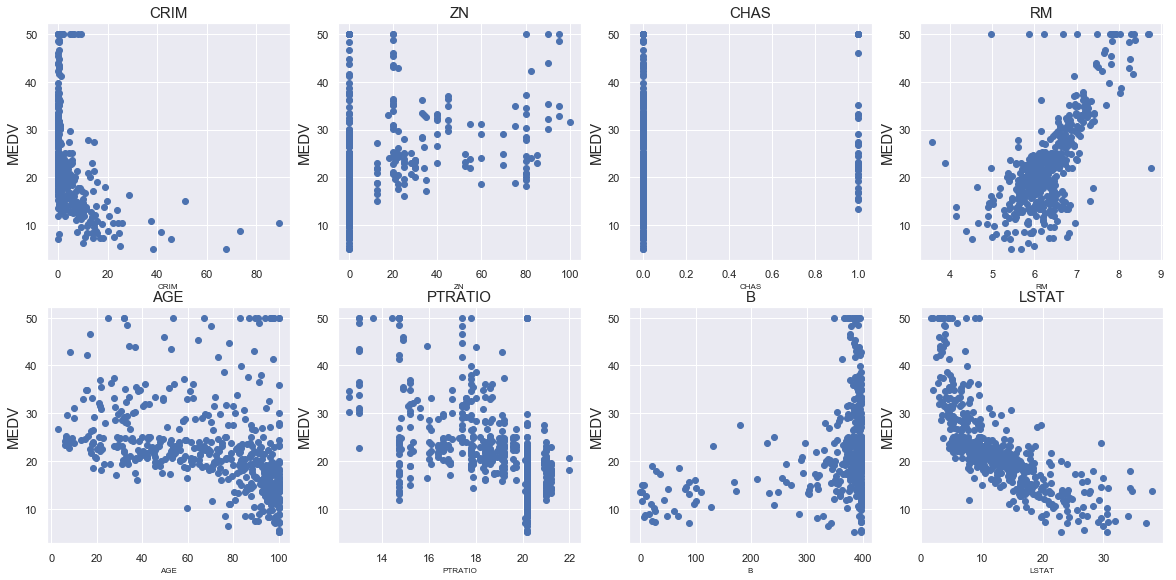

In [91]:
# Create multiple plots to understand the relationship between target variable and predictor variables
features = housing_data.drop('MEDV', 1).columns
target = housing_data['MEDV']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(housing_data[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('MEDV', fontsize=15)

# Linear Regression

In [93]:
# Data Partitioning
housing_data = housing_data.iloc[0:400]

predictors = ['CRIM', 'ZN', 'CHAS', 'RM', 'AGE', 'PTRATIO', 'B', 'LSTAT']
outcome = 'MEDV'

x = pd.get_dummies(housing_data[predictors], drop_first=True)
y = housing_data[outcome]
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size = 0.4)

housing_lm = LinearRegression()
housing_lm.fit(train_x, train_y)

LinearRegression()

In [94]:
# Variable Coffecients
print(pd.DataFrame({'Predictor': x.columns, 'coffecients': housing_lm.coef_}))

  Predictor  coffecients
0      CRIM     0.113720
1        ZN     0.010944
2      CHAS     2.270531
3        RM     4.807786
4       AGE     0.022519
5   PTRATIO    -0.786731
6         B    -0.002581
7     LSTAT    -0.669923


In [95]:
# Regression
train_df = train_x.join(train_y)

formula = 'MEDV ~ ' + '+'. join(predictors)
print(formula)

housing_lm = smf.ols(formula=formula, data=train_df).fit()
housing_lm.summary()

MEDV ~ CRIM+ZN+CHAS+RM+AGE+PTRATIO+B+LSTAT


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     67.37
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           3.81e-56
Time:                        23:28:34   Log-Likelihood:                -728.49
No. Observations:                 240   AIC:                             1475.
Df Residuals:                     231   BIC:                             1506.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.4514      6.283      2.300      0.022       2.072      26.830
CRIM           0.1137      0.099      1.144      0.254      -0.082       0.310
ZN             0.0109      0.016      0.705      0.481      -0.020       0.042
CHAS           2.2705      1.196      1.898      0.059      -0.087       4.628
RM             4.8078      0.667      7.208      0.000       3.494       6.122
AGE            0.0225      0.017      1.332      0.184      -0.011       0.056
PTRATIO       -0.7867      0.173     -4.561      0.000      -1.127      -0.447
B             -0.0026      0.009     -0.282      0.778      -0.021       0.015
LSTAT         -0.6699      0.085     -7.885      0.000      -0.837      -0.503
==============================================================================
Omnibus:                       98.137   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.228
Skew:                           1.481   Prob(JB):                    1.39e-132
Kurtosis:                      10.208   Cond. No.                     7.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Fitting the data into Test Data Set

In [96]:
# Fitting Multiple Linear regression model to training model 
regressor = LinearRegression() 
regressor.fit(train_x, train_y) 
   
# predicting the test set results 
pred_y = regressor.predict(valid_x) 

# Evaluation Metrics

In [97]:
print('MAE:', metrics.mean_absolute_error(valid_y, pred_y))
print('MSE:', metrics.mean_squared_error(valid_y, pred_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(valid_y, pred_y)))

MAE: 3.907837592741063
MSE: 31.354565881407904
RMSE: 5.599514789819552


# Conclusions

### 1. The R^2 value shows that 67.6% of the error is accounted for in the model. This value is not that great. 
### 2. MSE shows that the model is 72.18% accurate, however, it can be improved multifolds with a bigger data set, reducing multicollinearity or using other extensive ML models such as Lasso/Logistic Model. 